#### In this notebook Ridge Regression model will be use to predict diameter, absorbance, and PL output.
 
* The skill of the model will be reported as an error in those predictions: 
    * MSE
    * R2
    

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

import sklearn  
from sklearn.datasets import make_regression
from sklearn import linear_model, datasets
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from tqdm import tqdm

%matplotlib inline
matplotlib.rcParams.update({'font.size': 22})

In [2]:
df = pd.read_csv('../../../Datasets/augmented_data.csv')

In [3]:
df.head()

,Unnamed: 0,Unnamed: 0.1,Growth Temp (Celsius),Metal_mmol (mmol),Chalcogen_mmol (mmol),CA_mmol (mmol),Amines_mmol (mmol),Phosphines_mmol (mmol),S_I_amount (g),S_II_amount (g),...,x4_liquid parafin,x4_octadecene,x4_phenyl ether,x4_trioctylphosphine oxide,x5_None,x5_phosphinic acid,x5_trioctylphosphine oxide,Diameter_nm,Absorbance max (nm),PL max (nm)
0,0,0,1.105103,-0.437486,-0.243779,-0.525437,-0.416112,-0.165455,-0.123360,-0.302087,...,0,1,0,0,1,0,0,3.41,566.0,575.0
1,1,1,-0.062540,-0.472027,-0.436361,-0.305510,-0.498129,-0.375671,-0.241193,-0.302087,...,0,1,0,0,1,0,0,2.50,474.0,617.0
2,2,2,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.451959,-0.527427,-0.302087,...,0,1,0,0,1,0,0,1.99,450.4,497.0
3,3,3,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.13,471.6,510.0
4,4,4,0.326674,-0.472027,-0.587674,-0.525437,-0.498129,-0.445602,-0.527427,-0.302087,...,0,1,0,0,1,0,0,2.27,486.0,517.0


# Separate X and y data

In [4]:
#Separate X and y data
X_size = df.drop(columns =['Unnamed: 0','Unnamed: 0.1','Diameter_nm','Absorbance max (nm)', 'PL max (nm)'], 
                  inplace = False, axis = 1) #keep synthesis parameters that matter
y_size = df['Diameter_nm'].values #will predict diameter

In [5]:
#Separate X and y data
X_abs = df.drop(columns =['Unnamed: 0','Unnamed: 0.1','Diameter_nm','Absorbance max (nm)', 'PL max (nm)'], 
                  inplace = False, axis = 1) #keep synthesis parameters that matter
y_abs = df['Absorbance max (nm)'].values #will predict absorbance

In [6]:
#Separate X and y data
X_PL = df.drop(columns =['Unnamed: 0','Unnamed: 0.1','Diameter_nm','Absorbance max (nm)', 'PL max (nm)'], 
                  inplace = False, axis = 1) #keep synthesis parameters that matter
y_PL = df['PL max (nm)'].values #will predict PL

# Functions for optimising parameters for lowest MSE

In [7]:
def set_splitter(random_state):
    X_size_train, X_size_test, y_size_train, y_size_test = train_test_split(X_size, y_size, test_size=0.25, random_state=random_state, shuffle=True)

In [8]:
def ridge_estimator(X_train, X_test, y_train, y_test, alpha):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train,y_train)
    y_predict = ridge.predict(X_test)
    return mean_squared_error(y_test, y_predict)

In [9]:
def lowest_MSE_calculator(X_train, X_test, y_train, y_test, low, high, step):
    MSE_dict = {}
    
    for alpha in np.arange (low, high, step):
        MSE = ridge_estimator(X_train, X_test, y_train, y_test, alpha)
        MSE_dict[alpha] = MSE
    
    print("best alpha = ", min(MSE_dict, key=MSE_dict.get))

In [10]:
def wrap_fn(X_train, X_test, y_train, y_test):
    for random_state in range (0,100):
        set_splitter(random_state)
        lowest_MSE_calculator(X_train, X_test, y_train, y_test, 0, 1, 0.01)
        print(random_state)

# SIZE PREDICTION

In [15]:
wrap_fn(X_size_train, X_size_test, y_size_train, y_size_test)

best alpha =  0.05
0
best alpha =  0.05
1
best alpha =  0.05
2
best alpha =  0.05
3
best alpha =  0.05
4
best alpha =  0.05
5
best alpha =  0.05
6
best alpha =  0.05
7
best alpha =  0.05
8
best alpha =  0.05
9
best alpha =  0.05
10
best alpha =  0.05
11
best alpha =  0.05
12
best alpha =  0.05
13
best alpha =  0.05
14
best alpha =  0.05
15
best alpha =  0.05
16
best alpha =  0.05
17
best alpha =  0.05
18
best alpha =  0.05
19
best alpha =  0.05
20
best alpha =  0.05
21
best alpha =  0.05
22
best alpha =  0.05
23
best alpha =  0.05
24
best alpha =  0.05
25
best alpha =  0.05
26
best alpha =  0.05
27
best alpha =  0.05
28
best alpha =  0.05
29
best alpha =  0.05
30
best alpha =  0.05
31
best alpha =  0.05
32
best alpha =  0.05
33
best alpha =  0.05
34
best alpha =  0.05
35
best alpha =  0.05
36
best alpha =  0.05
37
best alpha =  0.05
38
best alpha =  0.05
39
best alpha =  0.05
40
best alpha =  0.05
41
best alpha =  0.05
42
best alpha =  0.05
43
best alpha =  0.05
44
best alpha =  0.05
4

In [17]:
#split dataset into train and test set
X_size_train, X_size_test, y_size_train, y_size_test = train_test_split(X_size, y_size, test_size=0.25, random_state=8, shuffle=True)

In [18]:
lowest_MSE_calculator(X_size_train, X_size_test, y_size_train, y_size_test, 0.0001, 1, 0.0001)

best alpha =  0.050800000000000005


In [20]:
ridge = Ridge(alpha=0.050800000000000005)
ridge.fit(X_size_train,y_size_train)
y_size_predict = ridge.predict(X_size_test)
MSE = mean_squared_error(y_size_test, y_size_predict)
R2 = r2_score(y_size_test, y_size_predict)
MAE = mean_absolute_error(y_size_test, y_size_predict)

print("MSE", MSE, "R2", R2, "MAE", MAE)


MSE 1.2321409122657416 R2 0.3194060773367644 MAE 0.70682683875576


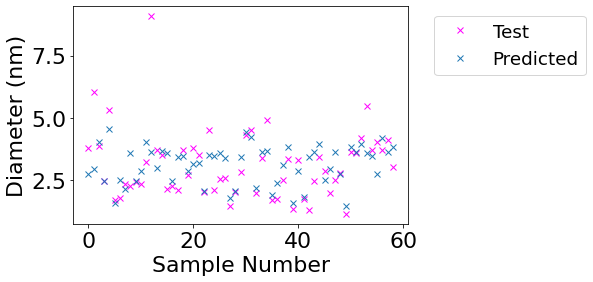

In [13]:
plt.figure()
plt.title("")
plt.plot(y_size_test,'x', color='magenta', label='Test')
plt.plot(y_size_predict,'x', label='Predicted')
plt.xlabel('Sample Number')
plt.ylabel('Diameter (nm)')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

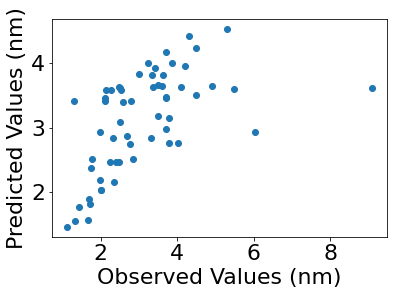

In [14]:
plt.figure()
plt.title("")
plt.plot(y_size_test, y_size_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

# ABSORBANCE PREDICTION

In [ ]:
wrap_fn(X_abs_train, X_abs_test, y_abs_train, y_abs_test)

In [12]:
#split dataset into train and test set
X_abs_train, X_abs_test, y_abs_train, y_abs_test = train_test_split(X_abs, y_abs, test_size=0.25, random_state=8, shuffle=True)

In [ ]:
lowest_MSE_calculator(X_abs_train, X_abs_test, y_abs_train, y_abs_test, 0.0001, 1, 0.0001)

In [13]:
ridge = Ridge(alpha=0.0476)
ridge.fit(X_abs_train,y_abs_train)
y_abs_predict = ridge.predict(X_abs_test)
MSE = mean_squared_error(y_abs_test, y_abs_predict)
R2 = r2_score(y_abs_test, y_abs_predict)

print("MSE", MSE, "R2", R2)


MSE 2060.449369587719 R2 0.5973120324604452


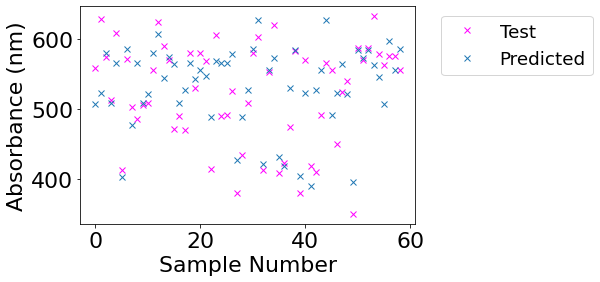

In [17]:
plt.figure()
plt.title("")
plt.plot(y_abs_test,'x', color='magenta', label='Test')
plt.plot(y_abs_predict,'x', label='Predicted')
plt.xlabel('Sample Number')
plt.ylabel('Absorbance (nm)')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

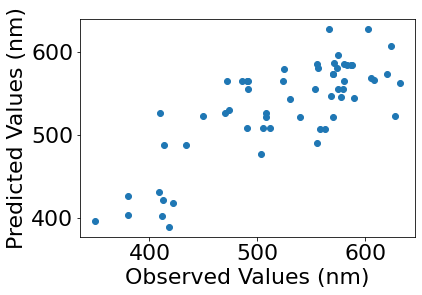

In [18]:
plt.figure()
plt.title("")
plt.plot(y_abs_test, y_abs_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()

# PL PREDICTION

In [ ]:
wrap_fn(X_PL_train, X_PL_test, y_PL_train, y_PL_test)

In [14]:
#split dataset into train and test set
X_PL_train, X_PL_test, y_PL_train, y_PL_test = train_test_split(X_PL, y_PL, test_size=0.25, random_state=8, shuffle=True)

In [ ]:
lowest_MSE_calculator(X_PL_train, X_PL_test, y_PL_train, y_PL_test, 0.0001, 1, 0.0001)

In [15]:
ridge = Ridge(alpha=0.057800000000000004)
ridge.fit(X_PL_train,y_PL_train)
y_PL_predict = ridge.predict(X_PL_test)
MSE = mean_squared_error(y_PL_test, y_PL_predict)
R2 = r2_score(y_PL_test, y_PL_predict)

print("MSE", MSE, "R2", R2)

MSE 1288.7991576397267 R2 0.2635158685736818


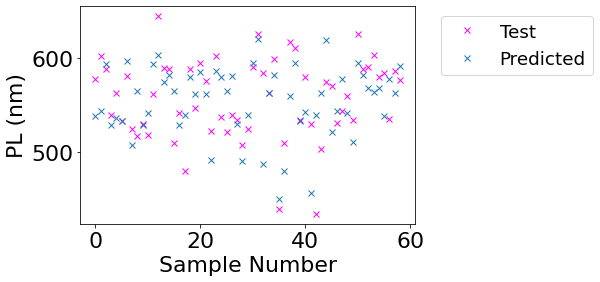

In [21]:
plt.figure()
plt.title("")
plt.plot(y_PL_test,'x', color='magenta', label='Test')
plt.plot(y_PL_predict,'x', label='Predicted')
plt.xlabel('Sample Number')
plt.ylabel('PL (nm)')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.show()

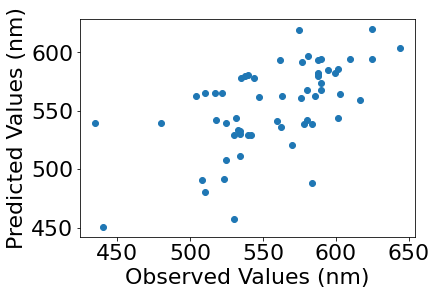

In [22]:
plt.figure()
plt.title("")
plt.plot(y_PL_test, y_PL_predict, 'o')
plt.xlabel('Observed Values (nm)')
plt.ylabel('Predicted Values (nm)')
plt.show()